In [2]:
import os
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py 

In [5]:
# Script to combine all signals into one
DATA_PATH = "C:/Users/LENOVO/Downloads/Data/Stress_dataset"
SAVE_PATH = "C:/Users/LENOVO/Downloads/ass1"
os.mkdir(SAVE_PATH)

final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'BVP': ['id','BVP','datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime'],
    

}

names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'BVP.csv':['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'],
    'TEMP.csv': ['TEMP'],
    
}

desired_signals = ['ACC.csv', 'BVP.csv','EDA.csv', 'HR.csv', 'TEMP.csv']
desired_signals = ['ACC.csv','BVP.csv','EDA.csv', 'HR.csv','TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
bvp = pd.DataFrame(columns=final_columns['BVP'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
temp = pd.DataFrame(columns=final_columns['TEMP'])


def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

for file in os.listdir(DATA_PATH):
    print(f'Processing {file}')
    for sub_file in os.listdir(os.path.join(DATA_PATH, file)):
        if not sub_file.endswith(".zip"):
            for signal in os.listdir(os.path.join(DATA_PATH, file, sub_file)):
                if signal in desired_signals:
                    df = pd.read_csv(os.path.join(DATA_PATH, file, sub_file, signal), names=names[signal], header=None)
                    if not df.empty:
                        if signal == 'ACC.csv':
                            acc = pd.concat([acc, process_df(df, file)])   
                        if signal == 'BVP.csv':
                            bvp = pd.concat([bvp, process_df(df, file)])
                        if signal == 'EDA.csv':
                            eda = pd.concat([eda, process_df(df, file)])
                        if signal == 'HR.csv':
                            hr = pd.concat([hr, process_df(df, file)])
                        if signal == 'TEMP.csv':
                            temp = pd.concat([temp, process_df(df, file)])
                        

print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)
bvp.to_csv(os.path.join(SAVE_PATH, 'combined_bvp.csv'), index=False)

Processing 15
Processing 5C
Processing 6B
Processing 6D
Processing 7A
Processing 7E
Processing 83
Processing 8B
Processing 94
Processing BG
Processing CE
Processing DF
Processing E4
Processing EG
Processing F5
Saving Data ...


Now all the csv files are all together in one folder . furthermore all files have diffrent colums so we cant access all the column that is why we have to merge all the data into a single data frame 

# Merging The Data Into Single Data Frame

In [6]:
folder_path = "C:/Users/LENOVO/Downloads/final_dta_extracted"

merged_df = pd.DataFrame()

# this lopp will merge all the csv files 
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        merged_df = pd.concat([merged_df, df], axis=1)

# mergeed_df has all the columns of the dataset
merged_df.to_csv('merged.csv', index=False)


# PRE-PROCESSING

# Now wehave all the signals in one data fram named as merged_df

In [7]:
merged_df.head(5)

,userid,X,Y,Z,accdatetime,userid,EDA,edadatetime,userid,HR,hrdatetime,userid,TEMP,tempdatetime
0,DF,-13,-3,61,1594231189,DF,0.000000,1594231189,DF,55.00,1.594231e+09,DF,30.59,1594231189
1,DF,-13,-3,60,1594231189,DF,0.042276,1594231189,DF,55.00,1.594231e+09,DF,30.59,1594231189
2,DF,-12,-2,60,1594231189,DF,0.064055,1594231190,DF,57.00,1.594231e+09,DF,30.59,1594231190
3,DF,-13,-3,60,1594231189,DF,0.064055,1594231190,DF,67.25,1.594231e+09,DF,30.59,1594231190
4,DF,-13,-3,61,1594231189,DF,0.065336,1594231190,DF,65.40,1.594231e+09,DF,30.59,1594231190


In [127]:
df=merged_df

In [128]:
df

,id,X,Y,Z,accdatetime,id,BVP,bvpdatetime,id,EDA,edadatetime,id,HR,hrdatetime,id,TEMP,tempdatetime
0,DF,-13,-3,61,1594231189,DF,0.00,1594231189,DF,0.000000,1594231189,DF,55.00,1.594231e+09,DF,30.59,1594231189
1,DF,-13,-3,60,1594231189,DF,0.00,1594231189,DF,0.042276,1594231189,DF,55.00,1.594231e+09,DF,30.59,1594231189
2,DF,-12,-2,60,1594231189,DF,0.00,1594231189,DF,0.064055,1594231190,DF,57.00,1.594231e+09,DF,30.59,1594231190
3,DF,-13,-3,60,1594231189,DF,0.00,1594231189,DF,0.064055,1594231190,DF,67.25,1.594231e+09,DF,30.59,1594231190
4,DF,-13,-3,61,1594231189,DF,0.00,1594231189,DF,0.065336,1594231190,DF,65.40,1.594231e+09,DF,30.59,1594231190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,DF,-47,2,44,1594320442,DF,-1.38,1594301856,EG,0.166543,1603637944,NaN,NaN,NaN,EG,29.97,1603638134
1048571,DF,-47,3,44,1594320442,DF,-3.49,1594301856,EG,0.172948,1603637944,NaN,NaN,NaN,EG,29.97,1603638134
1048572,DF,-47,2,43,1594320442,DF,-5.97,1594301856,EG,0.174230,1603637944,NaN,NaN,NaN,EG,30.03,1603638134
1048573,DF,-49,2,42,1594320442,DF,-8.51,1594301856,EG,0.174230,1603637944,NaN,NaN,NaN,EG,30.03,1603638134


In [129]:
#info function rovides the information of the data frame that how many null columns and the data type of the variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1048575 non-null  object 
 1   X             1048575 non-null  int64  
 2   Y             1048575 non-null  int64  
 3   Z             1048575 non-null  int64  
 4   accdatetime   1048575 non-null  int64  
 5   id            1048575 non-null  object 
 6   BVP           1048575 non-null  float64
 7   bvpdatetime   1048575 non-null  int64  
 8   id            1048575 non-null  object 
 9   EDA           1048575 non-null  float64
 10  edadatetime   1048575 non-null  int64  
 11  id            479520 non-null   object 
 12  HR            479520 non-null   float64
 13  hrdatetime    479520 non-null   float64
 14  id            1048575 non-null  object 
 15  TEMP          1048575 non-null  float64
 16  tempdatetime  1048575 non-null  int64  
dtypes: float64(5), int64(7), ob

In [130]:
## in this function we are obtaining the the number of null columns in the dataset
null_counts = df.isnull().sum()
print(null_counts)

id                   0
X                    0
Y                    0
Z                    0
accdatetime          0
id                   0
BVP                  0
bvpdatetime          0
id                   0
EDA                  0
edadatetime          0
id              569055
HR              569055
hrdatetime      569055
id                   0
TEMP                 0
tempdatetime         0
dtype: int64


In [131]:
##datatype of all the column
df.dtypes

id               object
X                 int64
Y                 int64
Z                 int64
accdatetime       int64
id               object
BVP             float64
bvpdatetime       int64
id               object
EDA             float64
edadatetime       int64
id               object
HR              float64
hrdatetime      float64
id               object
TEMP            float64
tempdatetime      int64
dtype: object

In this function we are filling all the null values with interpolate and the method we are choosing is the linear because if the working is with time series . so we can use interpolate and in linear method its chooses the value to two nearest neighbours

# IMPUTATION

# Filling Null Values

In [132]:
df = df.interpolate(method='linear')

In [133]:
print(df)

         id   X  Y   Z  accdatetime  id    BVP  bvpdatetime  id       EDA  \
0        DF -13 -3  61   1594231189  DF   0.00   1594231189  DF  0.000000   
1        DF -13 -3  60   1594231189  DF   0.00   1594231189  DF  0.042276   
2        DF -12 -2  60   1594231189  DF   0.00   1594231189  DF  0.064055   
3        DF -13 -3  60   1594231189  DF   0.00   1594231189  DF  0.064055   
4        DF -13 -3  61   1594231189  DF   0.00   1594231189  DF  0.065336   
...      ..  .. ..  ..          ...  ..    ...          ...  ..       ...   
1048570  DF -47  2  44   1594320442  DF  -1.38   1594301856  EG  0.166543   
1048571  DF -47  3  44   1594320442  DF  -3.49   1594301856  EG  0.172948   
1048572  DF -47  2  43   1594320442  DF  -5.97   1594301856  EG  0.174230   
1048573  DF -49  2  42   1594320442  DF  -8.51   1594301856  EG  0.174230   
1048574  DF -49  2  43   1594320442  DF -10.87   1594301856  EG  0.178073   

         edadatetime   id     HR    hrdatetime  id   TEMP  tempdatetime  
0

After filling the null values here is the count of null values of every column . the only column which have null value is id which dont affect other column

In [134]:
null_counts = df.isnull().sum()
print(null_counts)

id                   0
X                    0
Y                    0
Z                    0
accdatetime          0
id                   0
BVP                  0
bvpdatetime          0
id                   0
EDA                  0
edadatetime          0
id              569055
HR                   0
hrdatetime           0
id                   0
TEMP                 0
tempdatetime         0
dtype: int64



AS it can be clearly seen that the date and time column is in UNIX form so changing the date and time in utc format by using utc from time stamp method  

In [135]:
# converting the Unix time column to a datetime column for eda
df['edadatetime'] = df['edadatetime'].apply(datetime.utcfromtimestamp)

In [136]:
# converting the Unix time column to a datetime column for hr
df['hrdatetime'] = df['hrdatetime'].apply(datetime.utcfromtimestamp)

In [137]:
# converting the Unix time column to a datetime column for acc
df['accdatetime'] = df['accdatetime'].apply(datetime.utcfromtimestamp)

In [138]:
# converting the Unix time column to a datetime column for bvp
df['bvpdatetime'] = df['bvpdatetime'].apply(datetime.utcfromtimestamp)

In [139]:
# converting the Unix time column to a datetime column for temp
df['tempdatetime'] = df['tempdatetime'].apply(datetime.utcfromtimestamp)


After changing the time in timestamp format now the datset look like this 


In [140]:
df

,id,X,Y,Z,accdatetime,id,BVP,bvpdatetime,id,EDA,edadatetime,id,HR,hrdatetime,id,TEMP,tempdatetime
0,DF,-13,-3,61,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.000000,2020-07-08 17:59:49,DF,55.00,2020-07-08 17:59:59,DF,30.59,2020-07-08 17:59:49
1,DF,-13,-3,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.042276,2020-07-08 17:59:49,DF,55.00,2020-07-08 18:00:00,DF,30.59,2020-07-08 17:59:49
2,DF,-12,-2,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.064055,2020-07-08 17:59:50,DF,57.00,2020-07-08 18:00:01,DF,30.59,2020-07-08 17:59:50
3,DF,-13,-3,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.064055,2020-07-08 17:59:50,DF,67.25,2020-07-08 18:00:02,DF,30.59,2020-07-08 17:59:50
4,DF,-13,-3,61,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.065336,2020-07-08 17:59:50,DF,65.40,2020-07-08 18:00:03,DF,30.59,2020-07-08 17:59:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,DF,-47,2,44,2020-07-09 18:47:22,DF,-1.38,2020-07-09 13:37:36,EG,0.166543,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,29.97,2020-10-25 15:02:14
1048571,DF,-47,3,44,2020-07-09 18:47:22,DF,-3.49,2020-07-09 13:37:36,EG,0.172948,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,29.97,2020-10-25 15:02:14
1048572,DF,-47,2,43,2020-07-09 18:47:22,DF,-5.97,2020-07-09 13:37:36,EG,0.174230,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,30.03,2020-10-25 15:02:14
1048573,DF,-49,2,42,2020-07-09 18:47:22,DF,-8.51,2020-07-09 13:37:36,EG,0.174230,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,30.03,2020-10-25 15:02:14



# Co Relation Between The Columns


             X         Y         Z       BVP       EDA        HR      TEMP
X     1.000000 -0.164781  0.454503  0.000023 -0.031814 -0.021594 -0.055654
Y    -0.164781  1.000000 -0.142217  0.000140 -0.017370 -0.006726  0.083508
Z     0.454503 -0.142217  1.000000  0.000033  0.076732  0.066491  0.039254
BVP   0.000023  0.000140  0.000033  1.000000  0.000171  0.001117 -0.000222
EDA  -0.031814 -0.017370  0.076732  0.000171  1.000000  0.206856  0.513367
HR   -0.021594 -0.006726  0.066491  0.001117  0.206856  1.000000  0.348809
TEMP -0.055654  0.083508  0.039254 -0.000222  0.513367  0.348809  1.000000


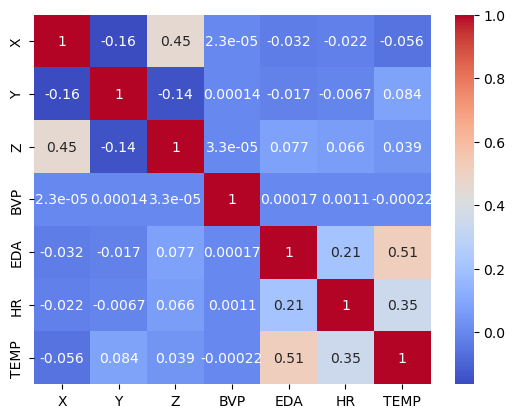

In [141]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:>

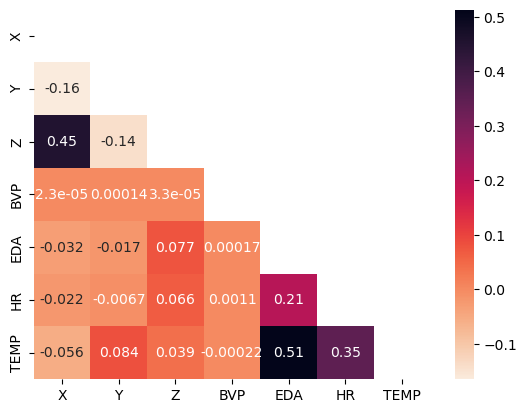

In [142]:
import numpy as np
import matplotlib.pyplot as plt
matrix=df.corr()
matrix=np.triu(df.corr())
#plt.figure(figzize=(16,10))
sns.heatmap(df.corr(),mask=matrix,annot=True,cmap="rocket_r")

In thsi heat map its clearly visible that the [EDA] and [HR] is highly co-related with [TEMP] so these three are the good signals for the stress predictor and can be further used for modellinga nd the stress prediction 

In [143]:
df

,id,X,Y,Z,accdatetime,id,BVP,bvpdatetime,id,EDA,edadatetime,id,HR,hrdatetime,id,TEMP,tempdatetime
0,DF,-13,-3,61,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.000000,2020-07-08 17:59:49,DF,55.00,2020-07-08 17:59:59,DF,30.59,2020-07-08 17:59:49
1,DF,-13,-3,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.042276,2020-07-08 17:59:49,DF,55.00,2020-07-08 18:00:00,DF,30.59,2020-07-08 17:59:49
2,DF,-12,-2,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.064055,2020-07-08 17:59:50,DF,57.00,2020-07-08 18:00:01,DF,30.59,2020-07-08 17:59:50
3,DF,-13,-3,60,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.064055,2020-07-08 17:59:50,DF,67.25,2020-07-08 18:00:02,DF,30.59,2020-07-08 17:59:50
4,DF,-13,-3,61,2020-07-08 17:59:49,DF,0.00,2020-07-08 17:59:49,DF,0.065336,2020-07-08 17:59:50,DF,65.40,2020-07-08 18:00:03,DF,30.59,2020-07-08 17:59:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,DF,-47,2,44,2020-07-09 18:47:22,DF,-1.38,2020-07-09 13:37:36,EG,0.166543,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,29.97,2020-10-25 15:02:14
1048571,DF,-47,3,44,2020-07-09 18:47:22,DF,-3.49,2020-07-09 13:37:36,EG,0.172948,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,29.97,2020-10-25 15:02:14
1048572,DF,-47,2,43,2020-07-09 18:47:22,DF,-5.97,2020-07-09 13:37:36,EG,0.174230,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,30.03,2020-10-25 15:02:14
1048573,DF,-49,2,42,2020-07-09 18:47:22,DF,-8.51,2020-07-09 13:37:36,EG,0.174230,2020-10-25 14:59:04,NaN,98.70,2020-07-23 22:01:26,EG,30.03,2020-10-25 15:02:14


That was the final look of the dataset

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

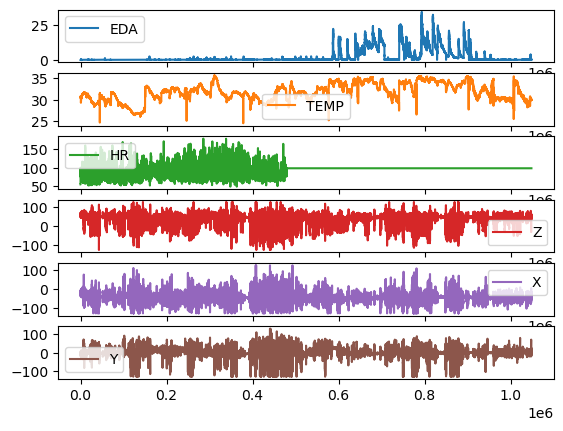

In [145]:
show_data = df[['EDA','TEMP','HR','Z','X','Y']]
show_data.plot(subplots=True)

there are three features which are having high correlation and they can be a good predictor for stress level which are 
['EDA','TEMP','HR'] . according to my observation these three features EDA , HR , TEMP will be the most import features and the important signals for the modelling of the algorithm because they are highly co-related with each other and it willbe affective as well . and these signal is the most important signals for detecting the STress level

# SURVEY RESULT DATASET

In [146]:
df_sur = pd.read_excel('C:/Users/LENOVO/Downloads/SurveyResults.xlsx')

# PREPROCESSING

In [147]:
df_sur.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [148]:
df_sur['date'] = pd.to_datetime(df_sur['date'])

if isinstance(df_sur['duration'][0], str):
    
    df_sur['duration'] = pd.to_datetime(df_sur['duration'], format='%H:%M:%S').dt.time
df_sur['datetime'] = df_sur['date'] + pd.to_timedelta(df_sur['duration'].astype(str))


print(df_sur)


     ID Start time  End time  duration       date Stress level COVID related  \
0    5C   08:00:00  09:00:00  01:00:00 2020-04-15            1             0   
1    5C   17:31:00  17:58:00  00:27:00 2020-04-14            1             0   
2    E4   15:32:00  15:37:00  00:05:00 2020-04-18            2             0   
3    E4   14:05:00  14:11:00  00:06:00 2020-04-18            2             0   
4    7A   13:52:00  14:03:00  00:11:00 2020-04-18            2             0   
..   ..        ...       ...       ...        ...          ...           ...   
353  83   23:05:00  23:50:00  00:45:00 2020-12-12            2             0   
354  83   00:12:00  02:01:00  01:49:00 2020-12-13            2             0   
355  83   20:34:00  20:48:00  00:14:00 2020-12-11            2             0   
356  83   20:54:00  21:13:00  00:19:00 2020-12-11            2             0   
357  BG   19:20:00  19:38:00  00:18:00 2020-12-11            2             0   

    Treating a covid patient Patient in

In [99]:
df_sur.set_index('datetime', inplace=True)

In the above code we giving indexing to the datetime . just beacuse its the time series data

In [100]:
df_sur.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
datetime,,,,,,,,,,,,,,,,,,,,
2020-04-15 01:00:00,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
2020-04-14 00:27:00,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2020-04-18 00:05:00,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
2020-04-18 00:06:00,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
2020-04-18 00:11:00,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [101]:
#finding Na values
na_count = df_sur.isnull().sum()
print(na_count)

ID                                                                          0
Start time                                                                  0
End time                                                                    0
duration                                                                    0
date                                                                        0
Stress level                                                                0
COVID related                                                               0
Treating a covid patient                                                    0
Patient in Crisis                                                           0
Patient or patient's family                                                 0
Doctors or colleagues                                                       0
Administration, lab, pharmacy, radiology, or other ancilliary services\n    0
Increased Workload                                              

In [102]:
#replacing na with NaN
df_sur.replace('na',np.nan, inplace=True)

In [103]:
df_sur.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
datetime,,,,,,,,,,,,,,,,,,,,
2020-04-15 01:00:00,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-04-14 00:27:00,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-04-18 00:05:00,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spoke with family regarding patient's decline ...
2020-04-18 00:06:00,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Was placing another FaceTime call to a patient...
2020-04-18 00:11:00,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [104]:
#finding Na values
na_count = df_sur.isnull().sum()
print(na_count)

ID                                                                            0
Start time                                                                    0
End time                                                                      0
duration                                                                      0
date                                                                          0
Stress level                                                                113
COVID related                                                               113
Treating a covid patient                                                    113
Patient in Crisis                                                           113
Patient or patient's family                                                 113
Doctors or colleagues                                                       113
Administration, lab, pharmacy, radiology, or other ancilliary services\n    113
Increased Workload                      

we are dropping start time and end time because we are working with time duration and also dropping description because it has more nan values

In [105]:
df_sur = df_sur.drop(['ID','Start time','End time','Description','duration','date'], axis=1)

In [106]:
df_sur.head()

,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures
datetime,,,,,,,,,,,,,,
2020-04-15 01:00:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14 00:27:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:05:00,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:06:00,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:11:00,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In this we are doing imputation because There are null values in the dataset . i used interpolate function and in method i used ffill which was forward fill . we havent fill the nan values by mean median just because its the timeseries dataset so if we fill that data with mean or median it will badly affect the other observations

# IMPUTATION / FILLING NAN VALUES

In [107]:
df_sur.interpolate(method='ffill')

,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures
datetime,,,,,,,,,,,,,,
2020-04-15 01:00:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14 00:27:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:05:00,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:06:00,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:11:00,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 00:45:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-13 01:49:00,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-11 00:14:00,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df_sur.head()

,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures
datetime,,,,,,,,,,,,,,
2020-04-15 01:00:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14 00:27:00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:05:00,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:06:00,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18 00:11:00,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Blow are the visualization of the factors the reason by which the working staff are feeling tensed or high work load

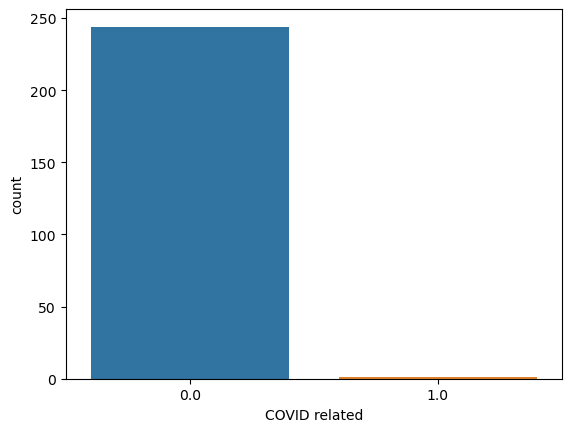

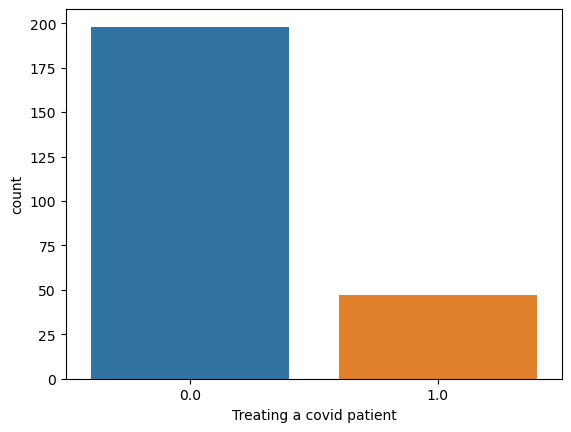

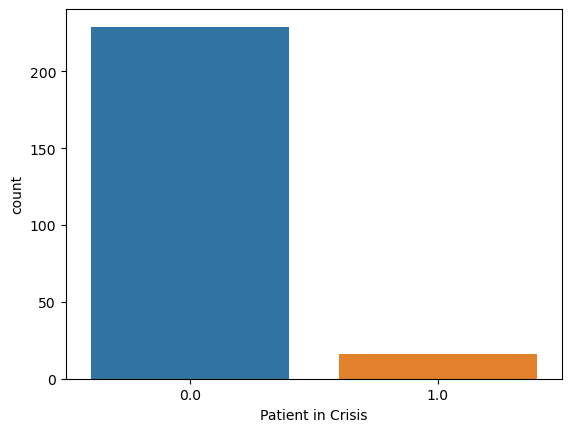

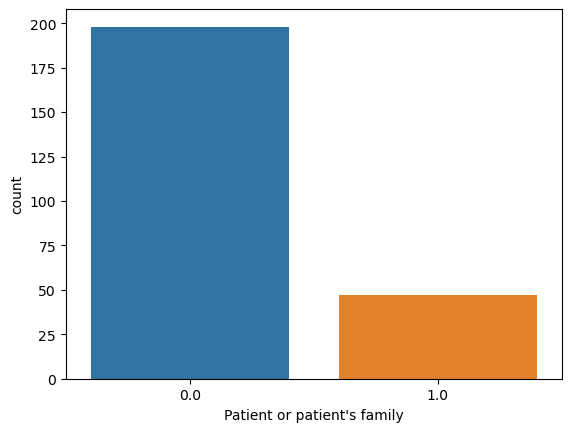

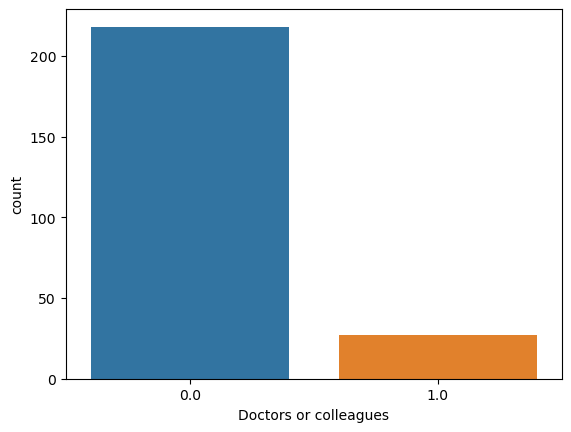

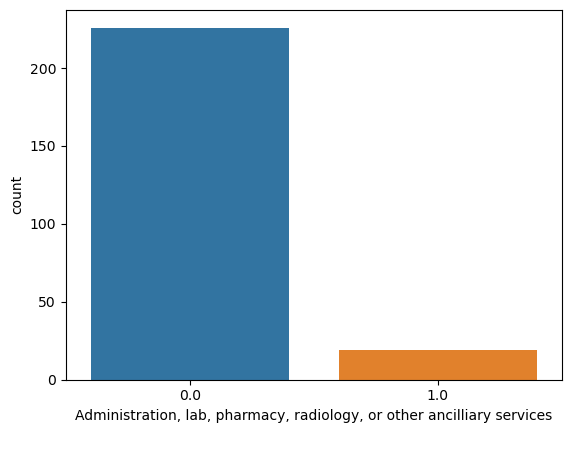

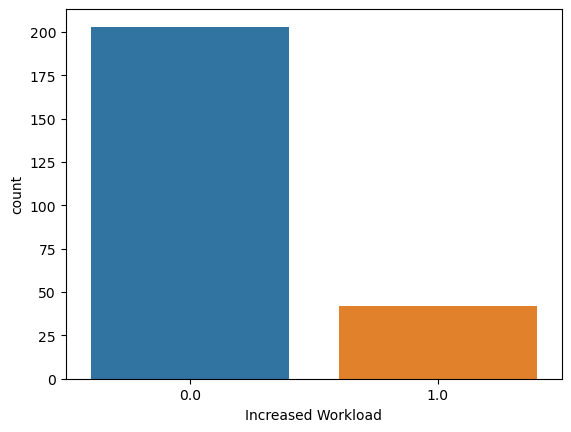

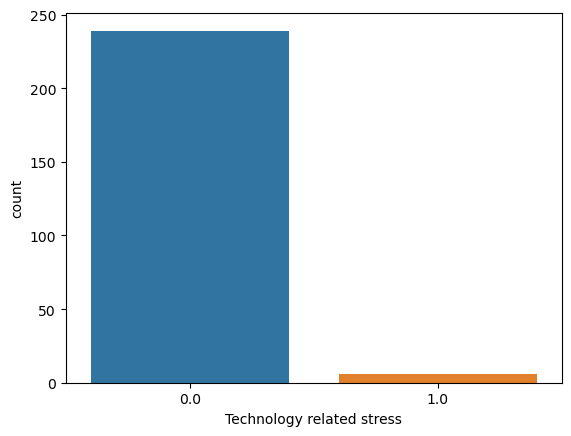

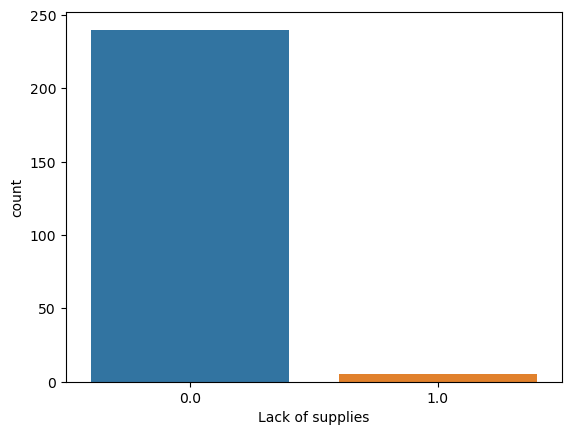

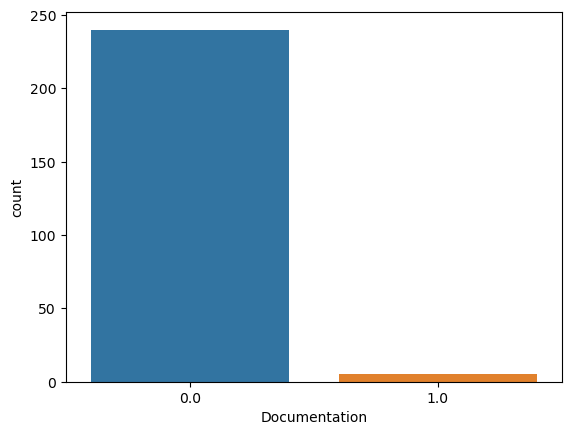

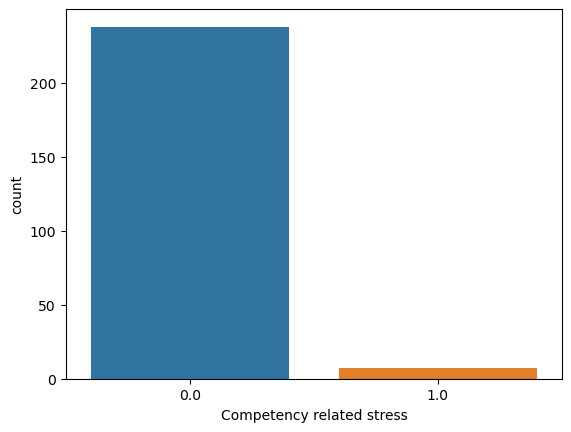

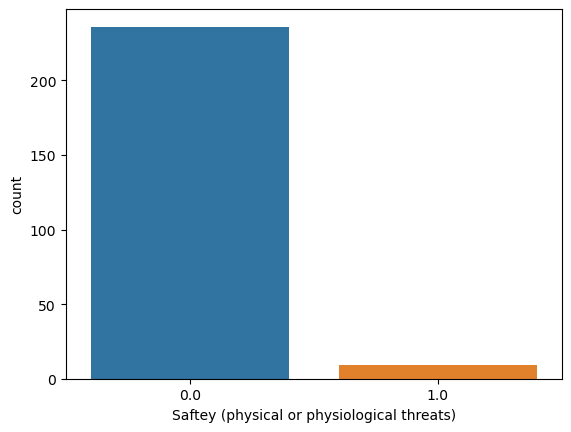

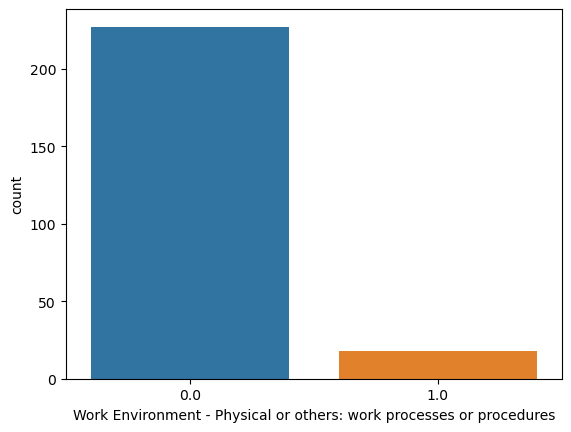

In [109]:
cols = df_sur.iloc[:,1: ]
col_name = cols.columns

for cols in col_name:
    sns.countplot(x=cols, data=df_sur)
    plt.show()

In [110]:
df_sur['Stress level'].value_counts()

2.0    179
0.0     46
1.0     20
Name: Stress level, dtype: int64

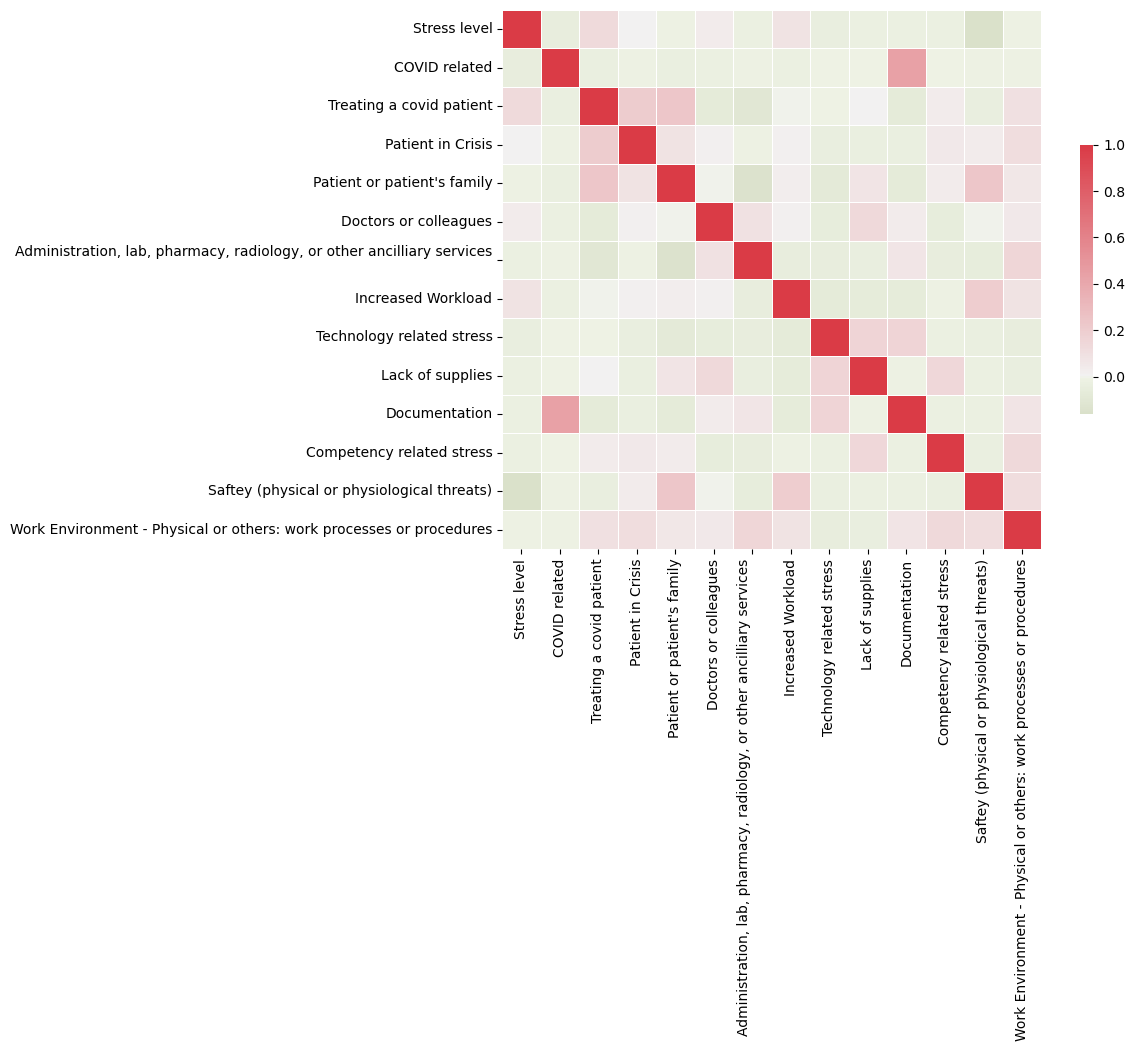

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df_sur.corr()

f, ax = plt.subplots(figsize=(10,7))

cmap = sns.diverging_palette(100,10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

I this corelation graph we can see that there are several reason which are causing stress and fatigue in the enviroment as well as in nurses which was represented by a heatmap




Below is the number of nurses participants which was stressed out. 179 feels high stress out of 245. 46 have no stress.20 are feeling medium stress

In [112]:
df_sur['Stress level'].value_counts()

2.0    179
0.0     46
1.0     20
Name: Stress level, dtype: int64

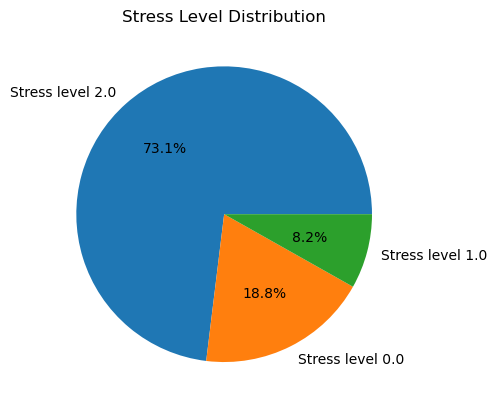

In [113]:
counts = df_sur['Stress level'].value_counts()
percentages = counts * 100 / counts.sum()

labels = [f"Stress level {i}" for i in counts.index]
plt.pie(percentages, labels=labels, autopct='%1.1f%%')

plt.title('Stress Level Distribution')

plt.show()


In rthis pie chart it can be clearly observed that the the chart is divided into three parts 
1) STRESS LEVEL 0.0
2) STRESS LEVEL 1.0
3) STRESS LEVEL 3.0

in this 0.0 is the no stress , and the other one 1.0 is Medium stress and the last one 2.0 is the high stress. furthermore a huge 
partition is observing a high stress which was around 73% and the second highest was no stress measured as 18.8% and the last one 
was medium stress counted as 8.2%

# FINAL OBSERVATIONS 

### FIRST OBSERVATION

 In the first datasets has many signals like EDA , Skin Temprature , BVP , Heart rate and out of this which i observed the [EDA],[TEMP],[HR] are the mpost important one just because ther are highly corelated with each other or in the future these three will be the important signals for the stress detection or for the further modelling.

### SECOND OBSERVATION

In the second dataset the survey result there are many factors which was affecting nurses and due to that there are the thresholds these points are describing the stress level of the nurses . These surveys are collected from the nurses and the reasons as well that why they are feeling stressed out  